In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import sys
from HighLevelFeatures import HighLevelFeatures as HLF
import numpy as np
import h5py
import matplotlib.pyplot as plt
from model import WGANGP
from train import *
from common import *
from evaluate import *

In [57]:
input_path = '../input/dataset1'
train_path = '../output/dataset1/v2/BNswish_hpo4-M1'
particle = 'photons'
model_i = get_best_mode_i(train_path, particle)
categories, E_gan_list = get_E_gan(733, input_file=f'{input_path}/dataset_1_photons_1.hdf5', train_path=train_path, eta_slice='20_25', mode='layer')

In [29]:
input_path = '../input/dataset1'
categories1, E_vox_list = get_E_truth(f'{input_path}/dataset_1_photons_1.hdf5', mode='layer')


In [84]:
E_vox_list.keys()

dict_keys([0, 1, 2, 3, 12])

In [99]:
def merge_energies(E_vox_list):
    concate = np.concatenate(E_vox_list, axis=0)
    return [concate.flatten()]

E_vox_list_merge_energy, E_gan_list_merge_energy = {}, {}
for ilayer in E_vox_list:
    E_vox_list_merge_energy[ilayer] = merge_energies(E_vox_list[ilayer])
    E_gan_list_merge_energy[ilayer] = merge_energies(E_gan_list[ilayer])


[ 0.00001     0.00001193  0.00001423  0.00001698  0.00002025  0.00002416
  0.00002882  0.00003438  0.00004101  0.00004892  0.00005836  0.00006962
  0.00008305  0.00009907  0.00011818  0.00014098  0.00016818  0.00020063
  0.00023933  0.0002855   0.00034058  0.00040629  0.00048467  0.00057817
  0.00068971  0.00082277  0.0009815   0.00117085  0.00139673  0.00166619
  0.00198763  0.00237108  0.00282851  0.00337418  0.00402513  0.00480165
  0.00572798  0.00683302  0.00815125  0.00972378  0.01159969  0.0138375
  0.01650702  0.01969155  0.02349043  0.02802219  0.03342822  0.03987718
  0.04757027  0.0567475   0.0676952   0.08075493  0.09633414  0.11491888
  0.13708898  0.16353612  0.19508544  0.23272124  0.27761771  0.3311756
  0.39506585  0.47128178  0.56220125  0.67066086  0.80004446  0.95438868
  1.13850892  1.35814956  1.62016316  1.93272432  2.30558464  2.750377
  3.28097851  3.91394343  4.66901966  5.56976486  6.64428142  7.92609324
  9.45519163 11.279283  ]


{' MeV': 39.58308726835722, 'All': 39.58308726835722}

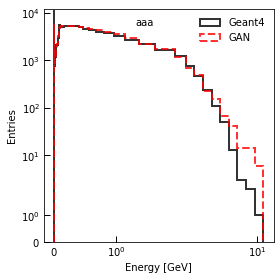

In [218]:
config = {
            'plot_chi2': False,
            'ax_text': 'aaa',
            'ax_pos': (0.4, 0.93),
            'leg_loc': "best",
            'logx': True,
            'logy': True,
            'range_factor_factor': (30000, 20000),
            'leg_size': 10,
    'nbins': 80,
        }
plot_Etot([''], E_vox_list_merge_energy[ilayer], E_gan_list_merge_energy[ilayer], config=config)

In [205]:
low, high = 0.1, 100
nbins=4
np.geomspace(low, high, num=nbins)

array([  0.1,   1. ,  10. , 100. ])

[-5.882 -5.647 -5.412 -5.177 -4.942 -4.707 -4.472 -4.237 -4.002 -3.767
 -3.532 -3.297 -3.062 -2.826 -2.591 -2.356 -2.121 -1.886 -1.651 -1.416
 -1.181 -0.946 -0.711 -0.476 -0.241 -0.006  0.23   0.465  0.7    0.935] [0.00000131 0.00000225 0.00000387 0.00000665 0.00001143 0.00001963
 0.00003373 0.00005794 0.00009954 0.000171   0.00029376 0.00050466
 0.00086696 0.00149279 0.00256448 0.00440555 0.00756833 0.0130017
 0.02233572 0.03837072 0.06591739 0.11324004 0.19453601 0.33419504
 0.57411646 0.98627949 1.69824365 2.91742701 5.01187234 8.60993752]


{' MeV': 124.28794603349036, 'All': 124.28794603349036}

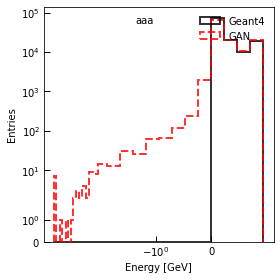

In [175]:
config = {
            'plot_chi2': False,
            'ax_text': 'aaa',
            'ax_pos': (0.4, 0.93),
            'leg_loc': "best",
            'logx': True,
            'logy': True,
            'range_factor_factor': (30000, 20000),
            'leg_size': 10,
        }
plot_Etot([''], E_vox_list_merge_energy[ilayer], E_gan_list_merge_energy[ilayer], config=config)

In [182]:
bins=np.array([-5.882, -5.647, -5.412, -5.177, -4.942, -4.707, -4.472, -4.237, -4.002 ,-3.767, -3.532, -3.297, -3.062, -2.826, -2.591, -2.356, -2.121, -1.886, -1.651, -1.416, -1.181, -0.946, -0.711, -0.476, -0.241, -0.006,  0.23 ,  0.465,  0.7 ,   0.935])
aa = np.power(10, bins)
aa[1:] - aa[:-1], bins[1:] - bins[:-1]

(array([0.00000094, 0.00000162, 0.00000278, 0.00000478, 0.0000082 ,
        0.0000141 , 0.00002421, 0.0000416 , 0.00007146, 0.00012276,
        0.0002109 , 0.0003623 , 0.00062583, 0.00107169, 0.00184106,
        0.00316278, 0.00543337, 0.00933403, 0.016035  , 0.02754666,
        0.04732265, 0.08129597, 0.13965903, 0.23992142, 0.41216302,
        0.71196417, 1.21918336, 2.09444532, 3.59806519]),
 array([0.235, 0.235, 0.235, 0.235, 0.235, 0.235, 0.235, 0.235, 0.235,
        0.235, 0.235, 0.235, 0.236, 0.235, 0.235, 0.235, 0.235, 0.235,
        0.235, 0.235, 0.235, 0.235, 0.235, 0.235, 0.235, 0.236, 0.235,
        0.235, 0.235]))

In [168]:
low=0.1
high=100

np.logspace(np.log10(low), np.log10(high), 4)

array([  0.1,   1. ,  10. , 100. ])

In [161]:
np.logspace(3, 10, num = 8)

array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

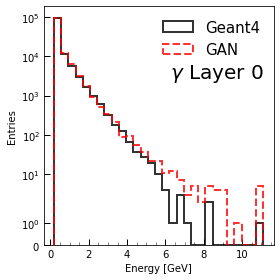

In [147]:
for ilayer in E_vox_list.keys():
    ax_text = particle_latex_name(particle) + ' Layer {}'.format(ilayer)
    config = {
        'plot_chi2': False,
        'ax_text': ax_text,
        'ax_pos': (0.55, 0.70),
        'leg_loc': "best",
        'logx': False,
        'logy': True,
        'range_factor_factor': (30000, 20000),
        'leg_size': 15,
    }
    plot_Etot([''], E_vox_list_merge_energy[ilayer], E_gan_list_merge_energy[ilayer], config=config)
    break


0.0 2.6918949545999946
0.0 95.55680754830838
0.0 986.1646472287467
0.0 11.402270235435
0.0 5.844510047150006


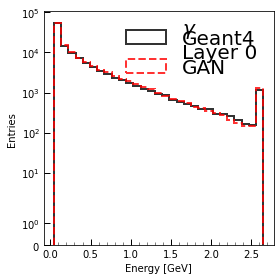

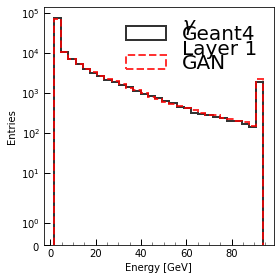

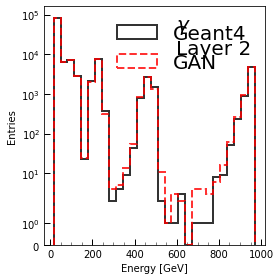

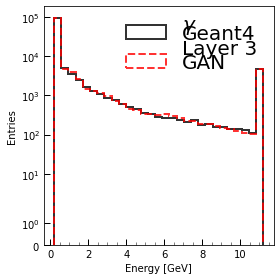

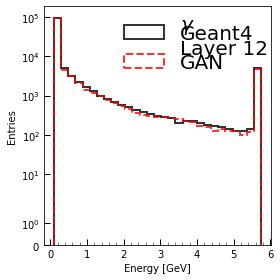

In [123]:
for ilayer in E_vox_list.keys():
    ax_text = particle_latex_name(particle) + '\nLayer {}'.format(ilayer)
    config = {
        'plot_chi2': False,
        'ax_text': ax_text,
        'ax_pos': (0.6, 0.8),
        'leg_loc': "best",
        'logx': False,
        'logy': True,
    }
    plot_Etot([''], E_vox_list_merge_energy[ilayer], E_gan_list_merge_energy[ilayer], config=config)


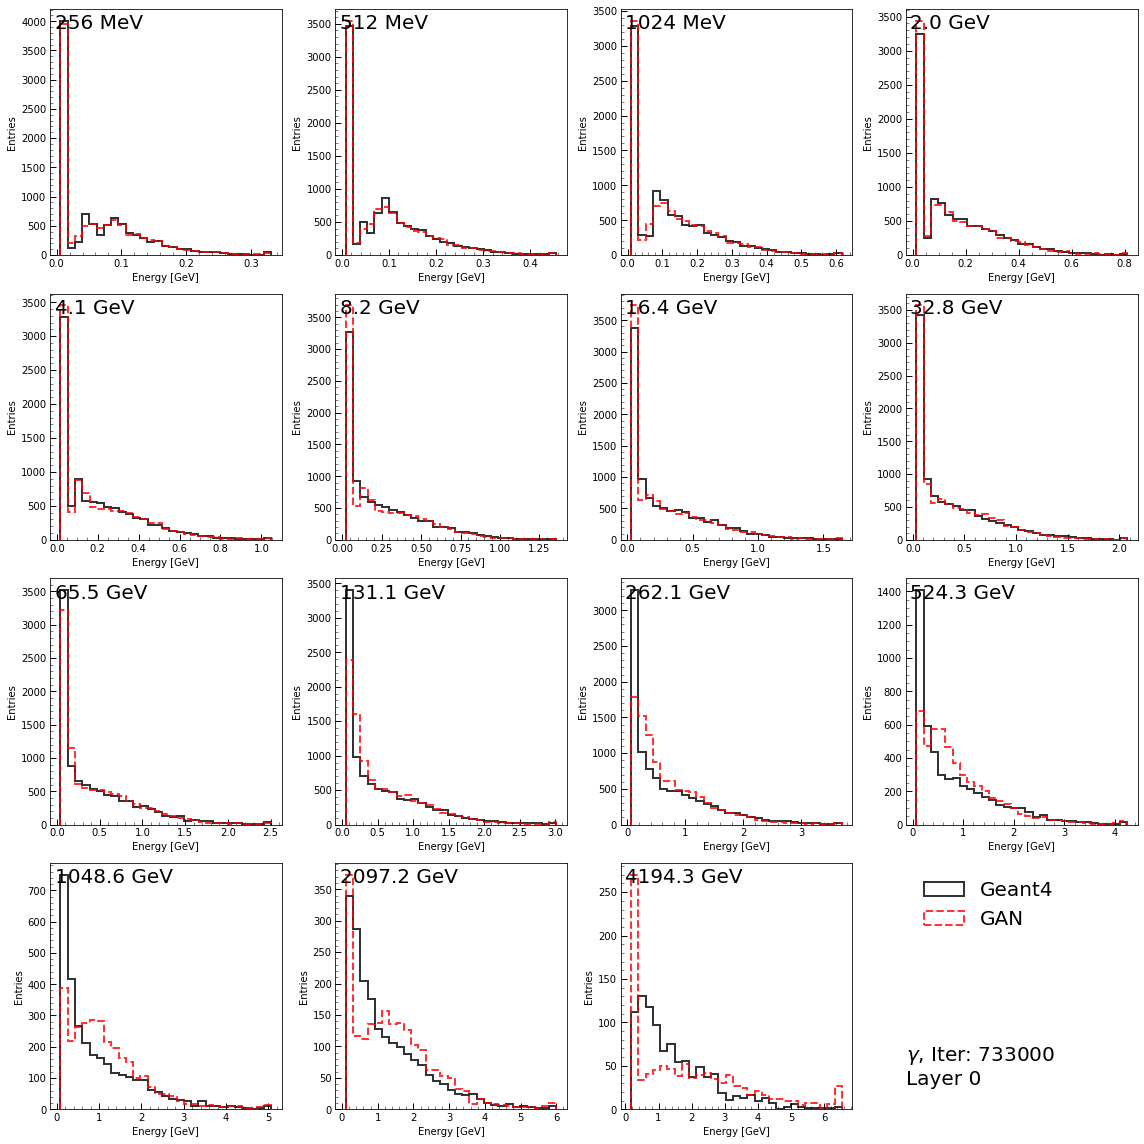

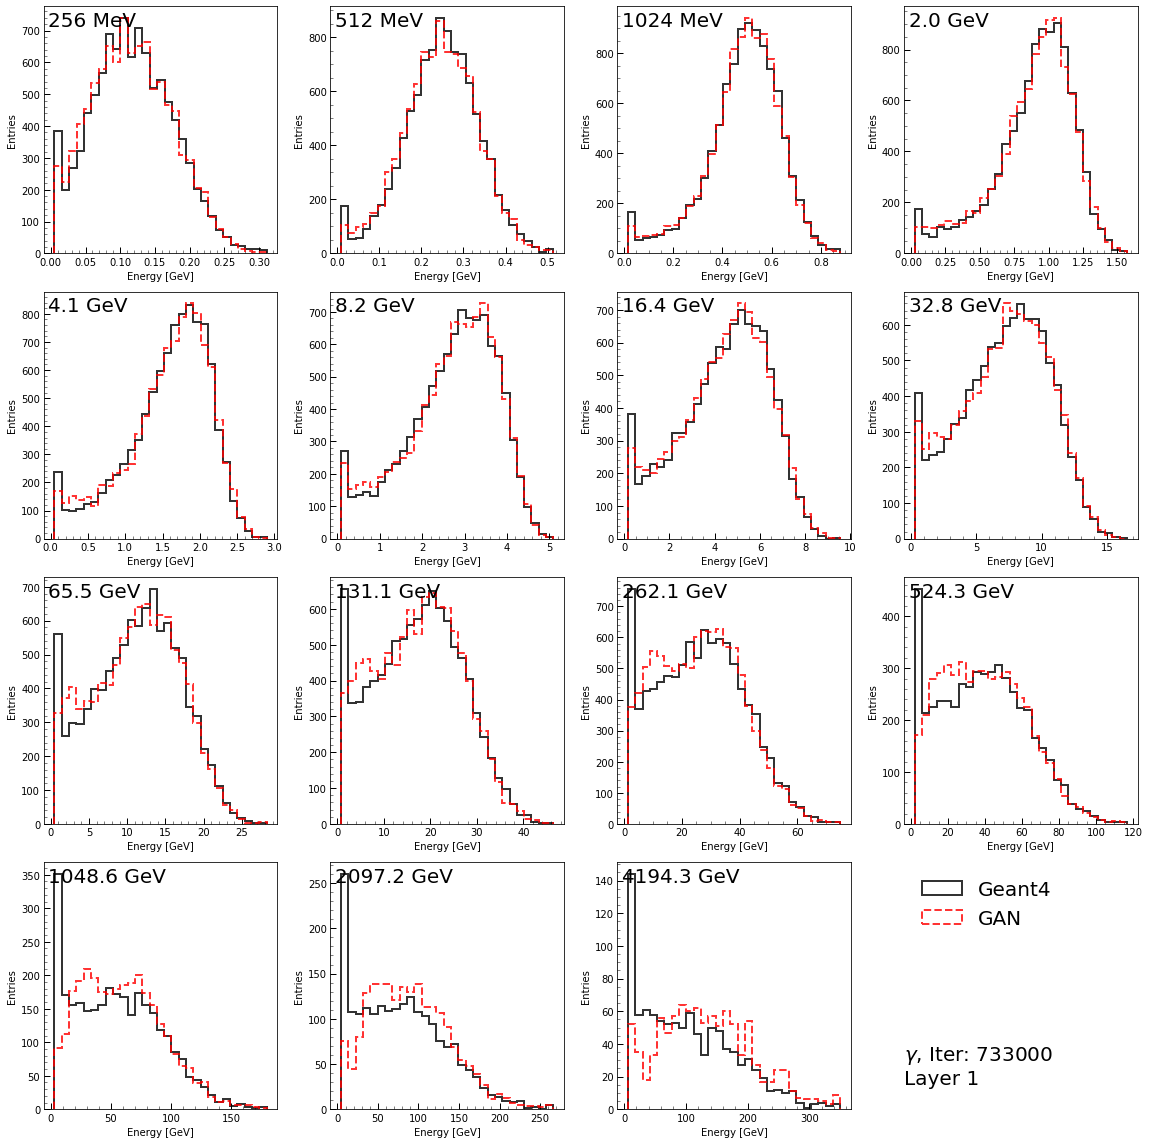

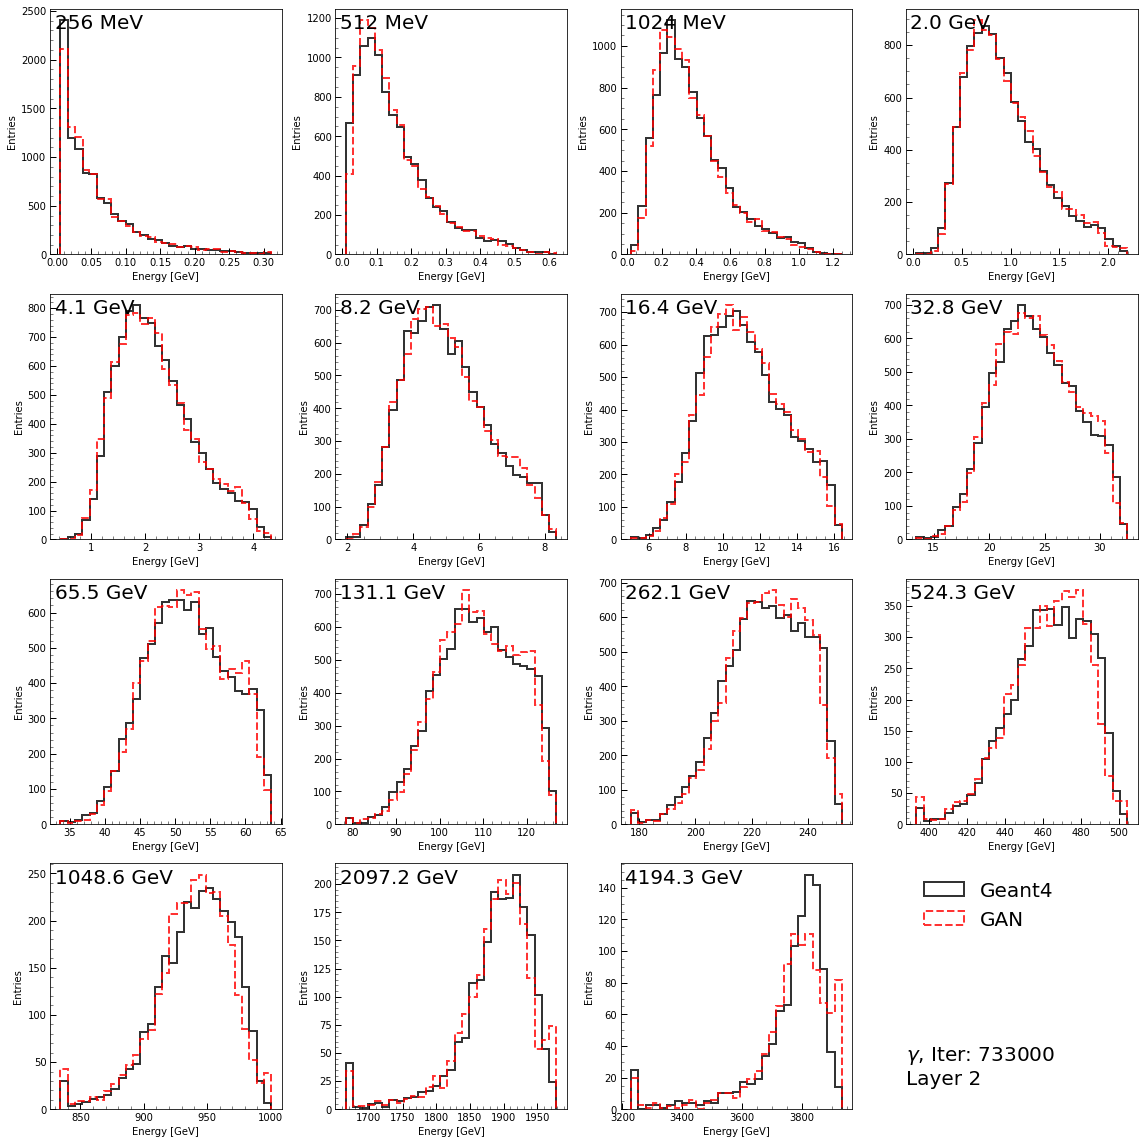

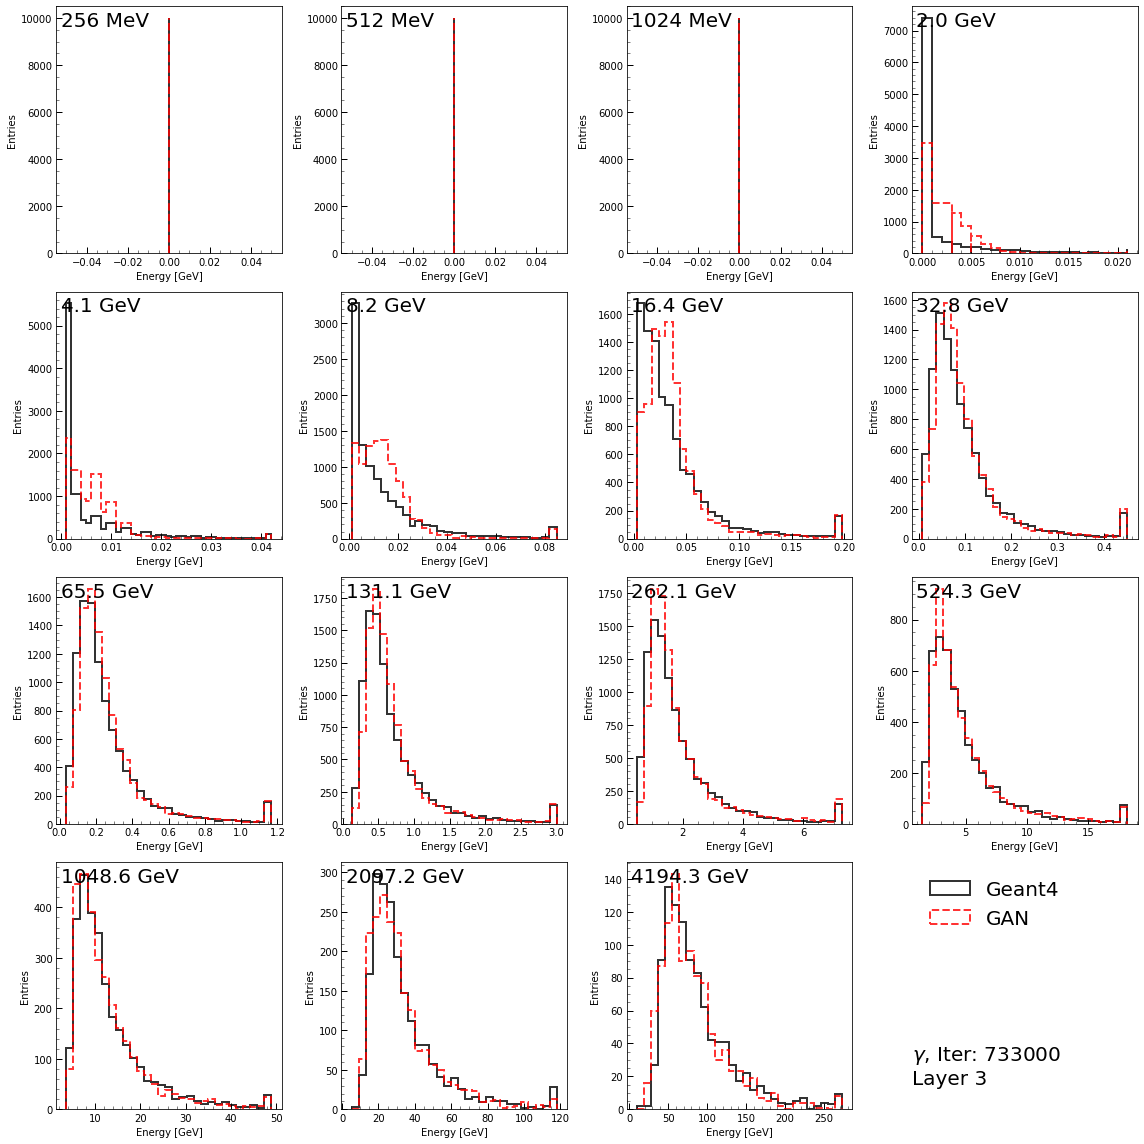

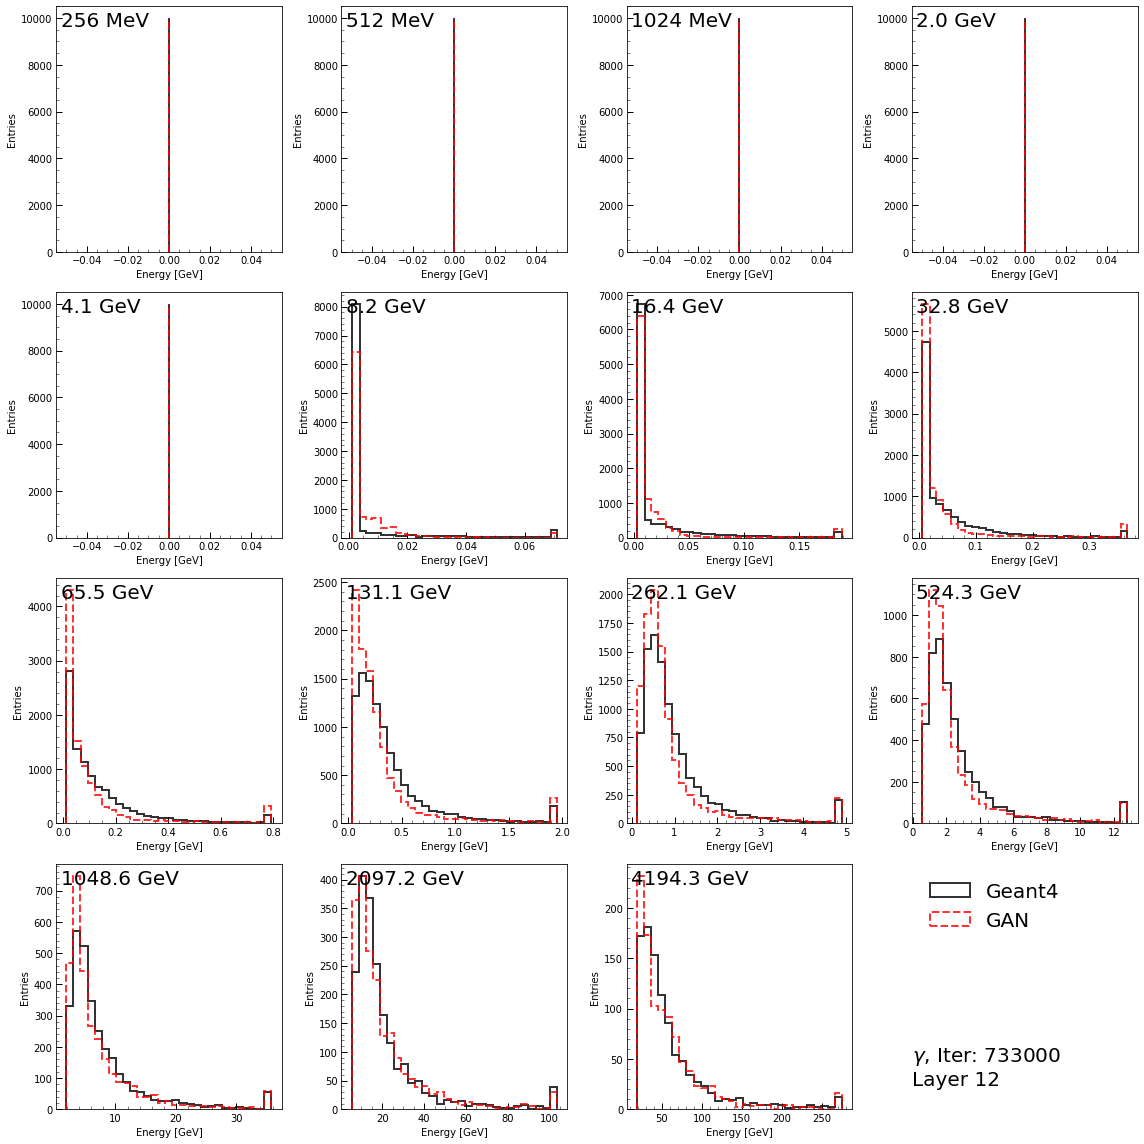

In [76]:
for ilayer in E_vox_list.keys():
    ax_text = particle_latex_name(particle)+ ", " + "Iter: {}".format(int(model_i)*1000) + '\nLayer {}'.format(ilayer)
    plot_Etot(categories, E_vox_list[ilayer], E_gan_list[ilayer], plot_chi2=False, ax_text=ax_text)
    

Create a condition label using the kinetic energy. The relativistic relation between kinetic energy and momentum is given by [ref](https://en.wikipedia.org/wiki/Kinetic_energy)

$$E_k = \sqrt{p^2 + m^2} - m$$

Label is normalised by LogE, ie

$$Lable (E_k) = \frac{log\frac{E_k}{E_{k, min}}}{log\frac{E_{k, max}}{E_{k, min}}} $$

In [4]:
mass = particle_mass(hlf.particle)
kin = np.sqrt( np.square(photon_file['incident_energies'][:]) + np.square(mass) ) - mass
label_kin = kin_to_label(kin)

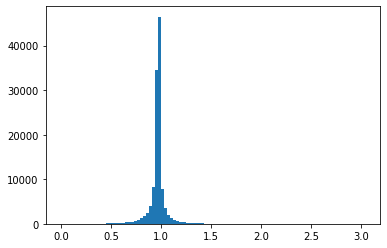

In [5]:
X_train = photon_file['showers'][:] / kin
_ = plt.hist(X_train.sum(axis=1), bins=100)

In [6]:
X_train.shape

(121000, 368)

(array([3.1000e+01, 9.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        1.0000e+01, 1.0000e+01, 1.7000e+01, 2.9000e+01, 1.8000e+01,
        3.4000e+01, 2.6000e+01, 4.2000e+01, 5.8000e+01, 6.0000e+01,
        7.5000e+01, 9.7000e+01, 1.0200e+02, 1.5200e+02, 1.9000e+02,
        2.8000e+02, 2.9900e+02, 4.3500e+02, 4.8500e+02, 6.5200e+02,
        9.2900e+02, 1.1910e+03, 1.7380e+03, 2.4820e+03, 4.0490e+03,
        8.2410e+03, 3.4531e+04, 4.6479e+04, 7.8250e+03, 3.5370e+03,
        2.0860e+03, 1.3590e+03, 9.3300e+02, 6.4600e+02, 4.6900e+02,
        3.6700e+02, 2.7200e+02, 1.6900e+02, 1.1300e+02, 9.2000e+01,
        8.4000e+01, 6.8000e+01, 4.2000e+01, 2.5000e+01, 2.9000e+01,
        2.1000e+01, 2.3000e+01, 1.1000e+01, 1.0000e+01, 1.0000e+01,
        8.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

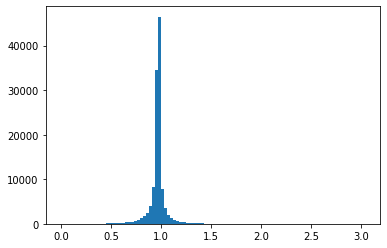

In [7]:
ratio = photon_file['showers'][:].sum(axis=1).reshape(-1,1) / photon_file['incident_energies'][:]
plt.hist(ratio, bins=100)

In [8]:
# HLF_1_photons.CalculateFeatures(photon_file["showers"][:])
# print("Total energy of each photon shower: ", HLF_1_photons.GetEtot())

# # energy deposited in each layer of the geometry:
# # (returns a dict with layer_number as key. Note that the ATLAS geometry has fewer relevant layer than are totally
# # available, the 5th layer of the photons therefore has layer_number 12)
# print("Energy deposited in each layer for each photon shower: ", HLF_1_photons.GetElayers())
# # print("Average energy deposited in the first layer for pion showers: ", HLF_1_pions.GetElayers()[0].mean())
# # print("Average energy deposited in the last layer for pion showers: ", HLF_1_pions.GetElayers()[14].mean())


# # # Center of energy in eta direction:
# # # (only available for layer with more than one alpha bin)
# # print("Center of energy in eta direction for each photon shower: ", HLF_1_photons.GetECEtas())
# # # and its width
# # print("Width of center of energy in eta direction for each photon shower: ", HLF_1_photons.GetWidthEtas())

# # # Center of energy in phi direction:
# # # (only available for layer with more than one alpha bin)
# # print("Center of energy in phi direction for each pion shower: ", HLF_1_pions.GetECPhis())
# # # and its width
# # print("Width of center of energy in phi direction for each pion shower: ", HLF_1_pions.GetWidthEtas())
